In [2]:
from video import *
import numpy as np
from utils import *

In [3]:
video_a = load_video("train/task1/09_query.mp4")
video_c = load_video("train/task1/09_reference.mp4")

In [4]:
a = video_a.get_frame(0).raw()
c = video_c.get_frame(1196).raw()

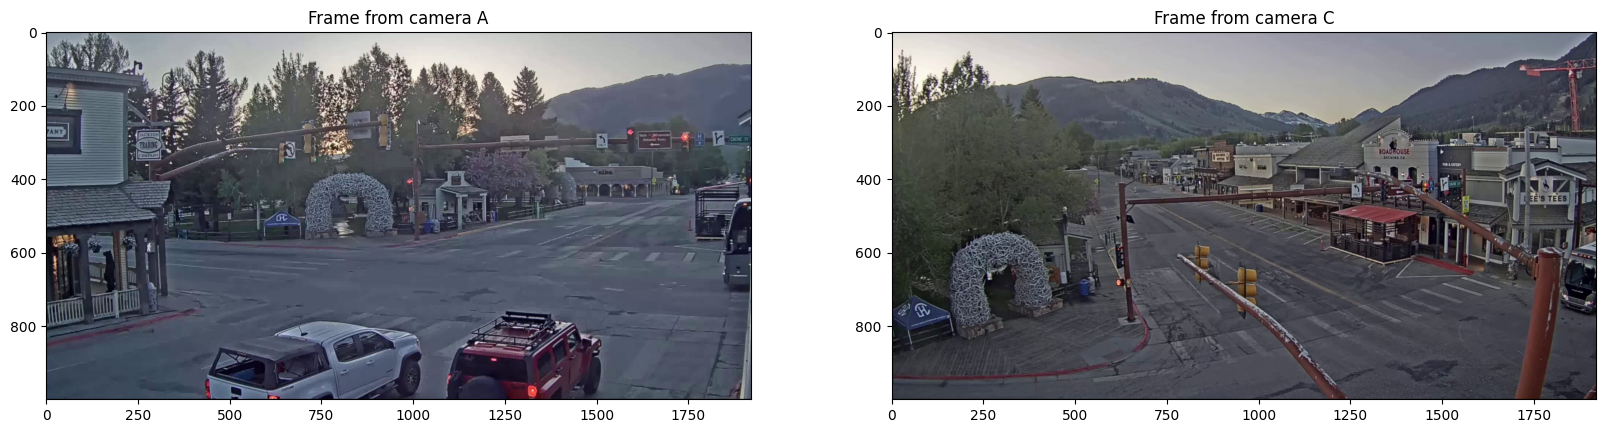

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].set_title("Frame from camera A")
axs[0].imshow(a)
axs[1].set_title("Frame from camera C")
axs[1].imshow(c)
plt.show()

In [6]:
cv.imwrite("correspondences/camera_a.png", cv.cvtColor(a, cv.COLOR_RGB2BGR))
cv.imwrite("correspondences/camera_c.png", cv.cvtColor(c, cv.COLOR_RGB2BGR))

True

In [7]:
coordinates_a = np.array(
[
    [655, 499],
    [991, 444],
    [1125, 434],
    [1507, 280],
    [1588, 288],
    [1737, 283],
    [1860, 278],
    [1824, 271],
    [1015, 568],
    [832, 590],
    [775, 595],
    [662, 588],
    [1094, 600],
    [1768, 554],
    [1833, 624],
    [640, 312],
    [734, 312],
    [285, 172],
    [1039, 508],
    [957, 552],
    [1406, 614],
    [1435, 592]
])
coordinates_c = np.array(
[
    [103, 746],
    [633, 636],
    [554, 559],
    [1267, 415],
    [1348, 420],
    [1464, 412],
    [1526, 403],
    [1509, 398],
    [672, 777],
    [609, 904],
    [559, 950],
    [400, 938],
    [950, 895],
    [1348, 624],
    [1663, 698],
    [960, 660],
    [840, 592],
    [1824, 600],
    [532, 672],
    [475, 744],
    [1399, 784],
    [1281, 741]
])

F, mask = cv.findFundamentalMat(coordinates_a, coordinates_c, cv.FM_8POINT)
print(F)
print(mask)

F_inv, mask= cv.findFundamentalMat(coordinates_c, coordinates_a, cv.FM_8POINT)
print(F_inv)
print(mask)

[[-5.7527e-07  5.5402e-06  -0.0003995]
 [-9.7317e-06  7.1693e-06  -0.0036525]
 [   0.003172   0.0029729           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[-5.7527e-07 -9.7317e-06    0.003172]
 [ 5.5402e-06  7.1693e-06   0.0029729]
 [ -0.0003995  -0.0036525           1]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


Text(0.5, 1.0, 'Camera C')

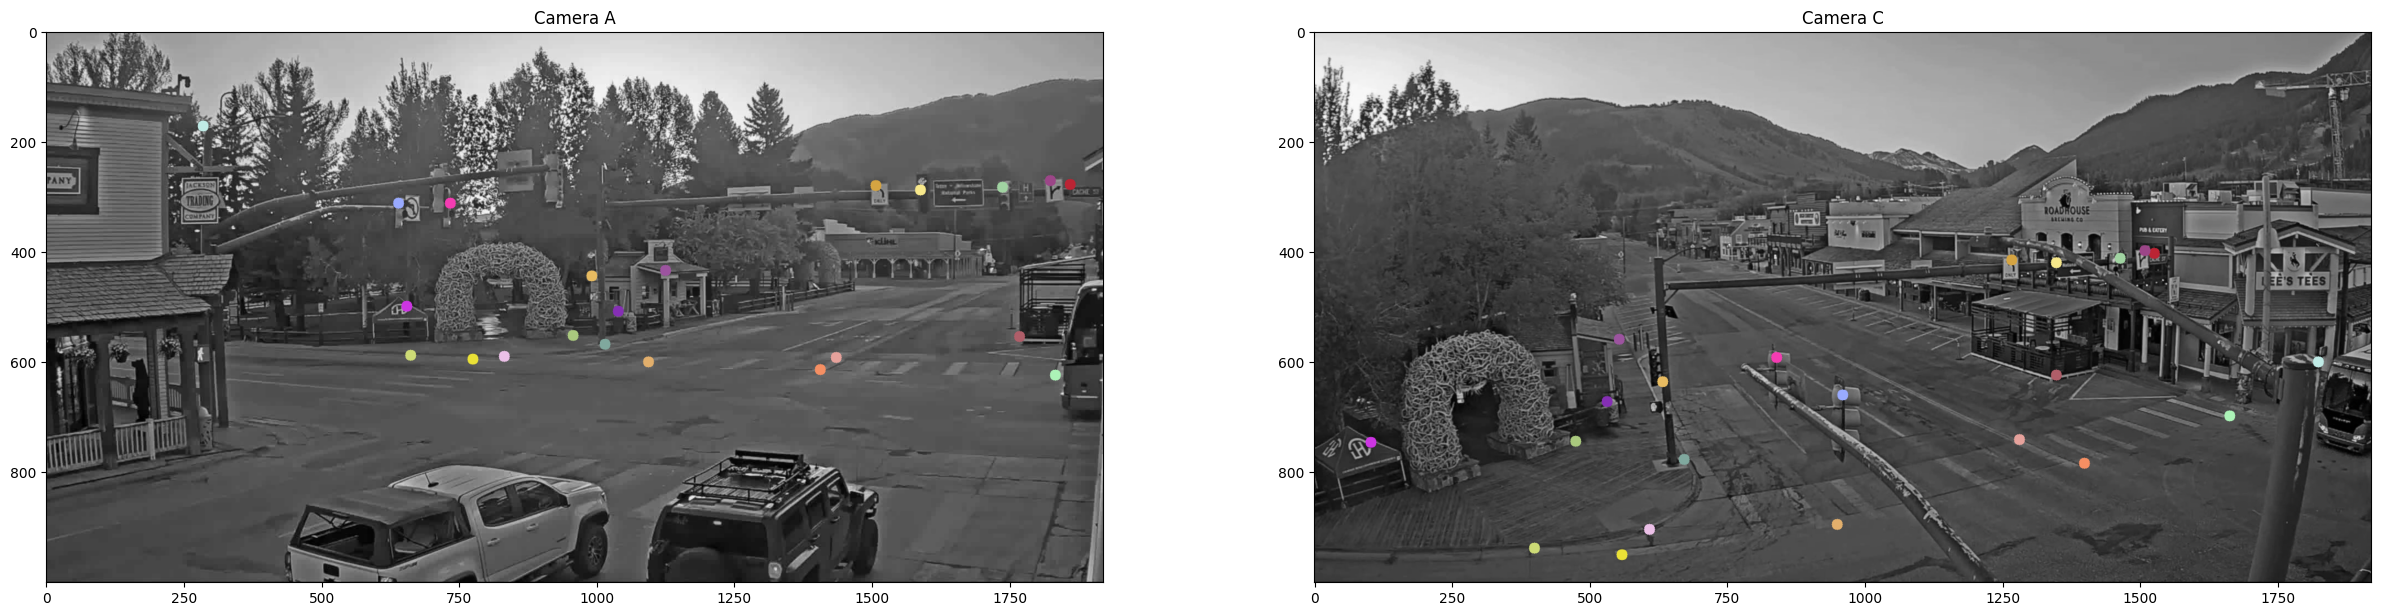

In [8]:
a_points = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
c_points = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

colors = [np.random.randint([100, 30, 50], [255, 255, 255]).tolist() for _ in range(len(coordinates_a))]
for i in range(len(coordinates_a)):
    cv.circle(a_points, tuple(coordinates_a[i]), 10, colors[i], -1)
    cv.circle(c_points, tuple(coordinates_c[i]), 10, colors[i], -1)

fig, ax = plt.subplots(1, 2, figsize=(30, 40))
ax[0].imshow(a_points)
ax[0].set_title("Camera A")
ax[1].imshow(c_points)
ax[1].set_title("Camera C")

6.713123155422399
2.490934908390045
16.2870056651238
12.534171871840954
6.844214521348476
1.8725122436881065
6.5410399325191975
3.826410240260884
1.3452575206756592
6.509884715669436
2.0193528532981873
50.77451014518738
50.046595576202606
3.1978971182046605
7.1510149538517
21.418439626693726
5.731274724006653
1.911266803741455
2.8371192119788655
2.6182580441236496
16.303221434354782
2.5329924096460585


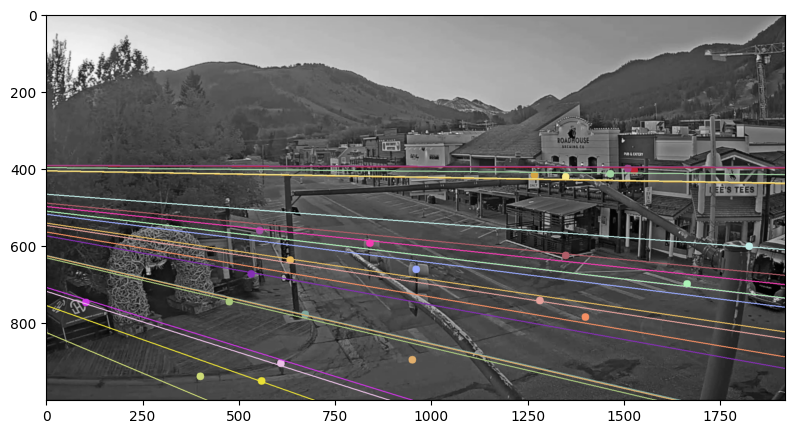

In [9]:
epilines = cv.computeCorrespondEpilines(coordinates_a.reshape(-1, 1, 2), 1, F)

for i, line in enumerate(epilines):
    draw_epiline(line[0], c_points, color=colors[i])
    print(distance_point_to_line(coordinates_c[i], line[0]))

plt.figure(figsize=(10, 5))
plt.imshow(c_points)

4.617737352848053
2.205532670021057
18.157663881778717
15.650149889290333
8.604055291655975
2.454057902097702
8.970628648996353
5.21708071231842
0.9915758967399597
3.6296414136886597
1.0320386607669987
24.131226062774658
32.35668343305588
3.5322837829589844
6.887847989797592
12.162599086761475
4.022796988487244
0.5600203424692154
2.5708024203777313
2.058312177658081
12.455421686172485
2.127802848815918


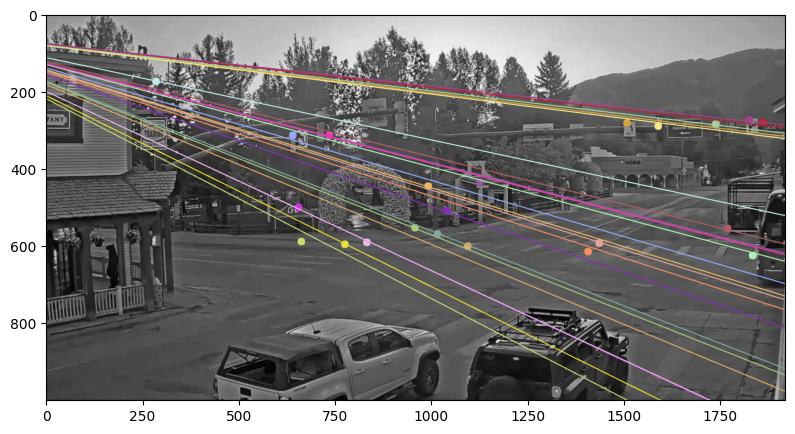

In [11]:
epilines = cv.computeCorrespondEpilines(coordinates_c.reshape(-1, 1, 2), 1, F_inv)

for i, line in enumerate(epilines):
    draw_epiline(line[0], a_points, color=colors[i])
    print(distance_point_to_line(coordinates_a[i], line[0]))

plt.figure(figsize=(10, 5))
plt.imshow(a_points)

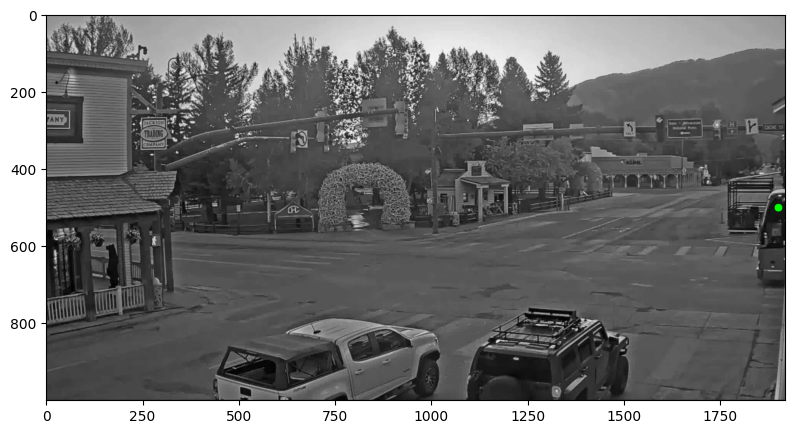

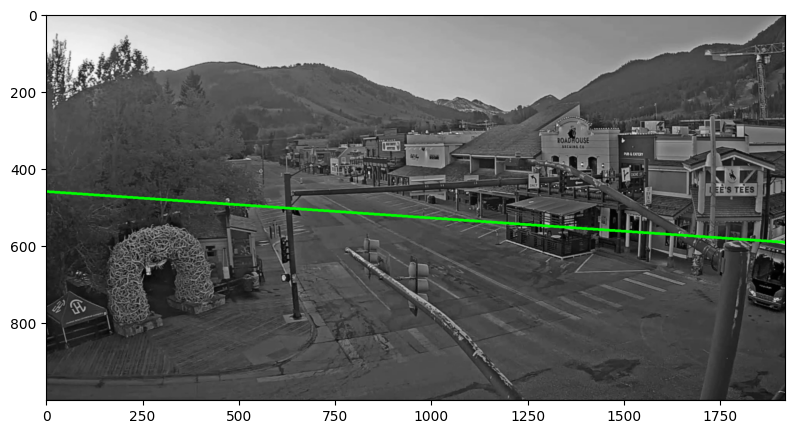

In [12]:
a_copy = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
c_copy = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

point = [1900, 500]
cv.circle(a_copy, tuple(point), 10, [0, 255, 0], -1)

epiline = cv.computeCorrespondEpilines(np.array([point]).reshape(-1, 1, 2), 1, F)[0][0]
x0, y0 = map(int, [0, -epiline[2] / epiline[1]])
x1, y1 = map(int, [c.shape[1], -(epiline[2] + epiline[0] * c.shape[1]) / epiline[1]])
cv.line(c_copy, (x0, y0), (x1, y1), [0, 255, 0], 5)


plt.figure(figsize=(10, 5))
plt.imshow(a_copy)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(c_copy)
plt.show()

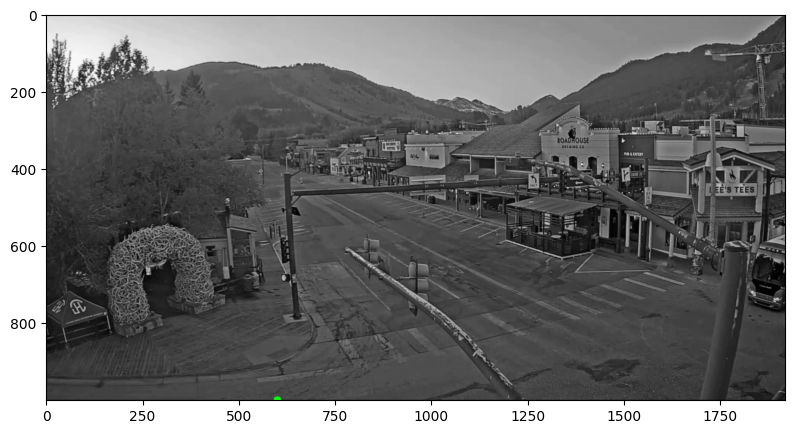

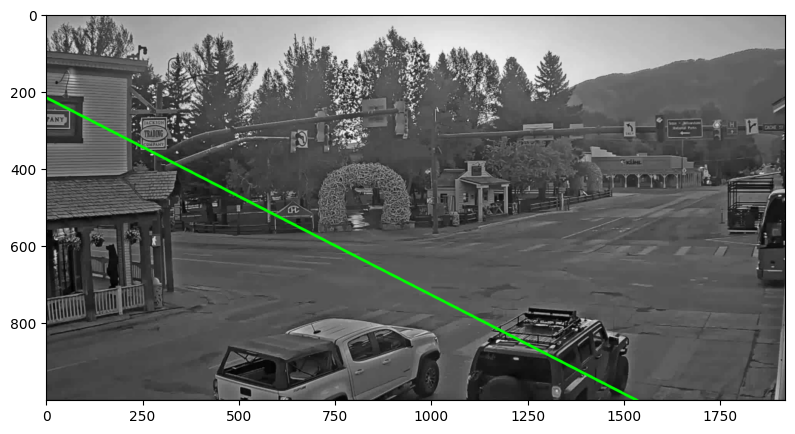

In [13]:
c_copy = cv.cvtColor(cv.cvtColor(np.copy(c), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)
a_copy = cv.cvtColor(cv.cvtColor(np.copy(a), cv.COLOR_RGB2GRAY), cv.COLOR_GRAY2RGB)

point = [600, 1000]
cv.circle(c_copy, tuple(point), 10, [0, 255, 0], -1)

epiline = cv.computeCorrespondEpilines(np.array([point]).reshape(-1, 1, 2), 1, F_inv)[0][0]
x0, y0 = map(int, [0, -epiline[2] / epiline[1]])
x1, y1 = map(int, [c.shape[1], -(epiline[2] + epiline[0] * c.shape[1]) / epiline[1]])
cv.line(a_copy, (x0, y0), (x1, y1), [0, 255, 0], 5)


plt.figure(figsize=(10, 5))
plt.imshow(c_copy)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(a_copy)
plt.show()

In [14]:
np.save("fundamental_matrices/AC.npy", F)
np.save("fundamental_matrices/CA.npy", F_inv)